# 7o Lab de PSD (notebook para preencher com os resultados)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Número do Grupo : `Grupo 8`

In [2]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
import cv2

# **1.0 - Definição do filtro de Gabor 2D (domínio espacial)**

O filtro de Gabor é um filtro do tipo passa-banda que possui alguns parâmetros que permitem que ele possa ser ajustado para realçar informações com diferentes escalas e orientações em uma imagem. A sua forma geral é dada pela equação abaixo.

$$\begin{aligned}
G(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp \left( -\frac{x'^2 + \gamma^2 y'^2}{2\sigma^2} \right) \cos\left( 2\pi \frac{x'}{\lambda} + \psi \right)
\end{aligned}$$

$$\begin{aligned}
x'&= x\cos\theta + y\sin\theta\\
y'&=-x\sin\theta + y\cos\theta\\
\end{aligned}$$

$\lambda$ = comprimento de onda do fator senoidal

$\theta$ = ângulo de orientação do filtro

$\gamma$ = controla a razão de aspecto do filtro

$\psi$ = fase da função senoidal

## **1.1 - Implementação do filtro de Gabor 2D**

Na implementação do filtro de Gabor 2D, utilizar uma máscara de tamanho $M \times N$, em que M=64 e N=64. Após a implementação do filtro, verifique se o filtro se encontra na forma normalizada, ou seja, que o máximo valor de coeficiente é igual a 1.0

In [3]:
#
# Implementar a função Gabor 2D
#
def gabor(lamda, theta, psi, sigma, gamma, M, N):
  x = np.linspace(-M//2, M//2, M)
  y = np.linspace(-N//2, N//2, N)

  xx, yy = np.meshgrid(x,y)

  x_bar = xx*np.cos(theta) + yy*np.sin(theta)
  y_bar = -xx*np.sin(theta) + yy*np.cos(theta)

  gab_filter = np.exp(-(x_bar**2+((gamma**2)*(y_bar**2)))/(2*(sigma**2)))*np.cos(2*np.pi*(x_bar/lamda)+psi)
  
  return gab_filter 

## 1.2 - Plotar, como imagem, os filtros de Gabor (par e ímpar) a partir do filtro implementado acima

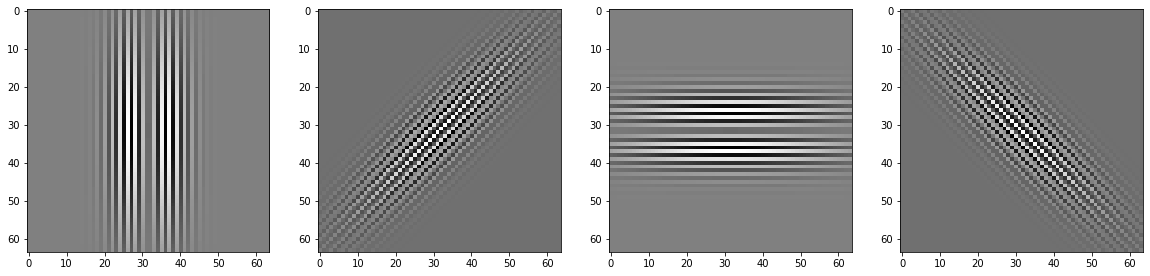

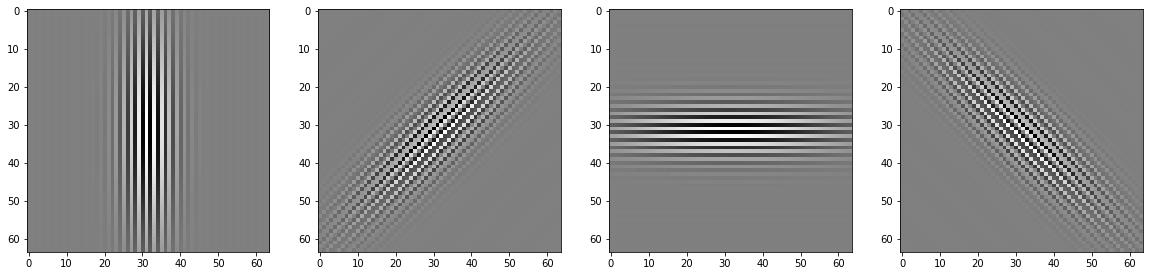

In [4]:
plt.figure(figsize=[20,20])

# PAIR FUNCTION
plt.subplot(141),plt.imshow(gabor(2, 0, 0, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(142),plt.imshow(gabor(2, np.pi/4, 0, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(143),plt.imshow(gabor(2, np.pi/2, 0, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(144),plt.imshow(gabor(2, 3*np.pi/4, 0, 5, 0.25, 64, 64), cmap = 'gray')
plt.show()

# ODD FUNCTION cos(theta + pi/2) [pair] = sin(theta) [odd]
plt.figure(figsize=[20,20])
plt.subplot(141),plt.imshow(gabor(2, 0, np.pi/2, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(142),plt.imshow(gabor(2, np.pi/4, np.pi/2, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(143),plt.imshow(gabor(2, np.pi/2, np.pi/2, 5, 0.25, 64, 64), cmap = 'gray')
plt.subplot(144),plt.imshow(gabor(2, 3*np.pi/4, np.pi/2, 5, 0.25, 64, 64), cmap = 'gray')
plt.show()

## 1.3 - Testes com diferentes filtros 

Usando a imagem fornecida, faça a convolução da imagem com o filtro para os seguintes conjuntos de parâmetros:

a) Fixe $\gamma = \sigma = 1.0$, $\lambda = 0.2$ e $\psi=0$. Então, varie $\theta = 0^{°}, 45^{°}$ e $90^{°}$

b) Fixe $\gamma = 1.5$, $\sigma = 2.0$, $\lambda = 0.2$ e $\psi=0$. Então, varie $\theta = 0^{°}, 45^{°}$ e $90^{°}$

c) Para os dois conjuntos de parâmetros acima, modifique apenas o valor de $\psi$ para $\psi = \frac{\pi}{2}$ - Rode os experimentos novamente.

Para cada um dos itens acima, plote os filtros gerados e faça a convolução de cada um deles com a imagem fornecida para essa prática.


## 1.3 - Filtros de Gabor usando OpenCV

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#
# Parâmetros do filro
#

ksize = 40
sigma = 2
theta = 0 #1*np.pi / 2
labda = 1*np.pi / 4
gamma = 1.0
phi = np.pi/2

#
# Usar a função getGaborKernel do OpenCV para criar um filtro Gabor com os parâmetros especificados acima
#

gabFilter = cv2.getGaborKernel((ksize, ksize), sigma, theta, labda, gamma, phi)


# Fixed the value of the A parameters
ksize = 40
sigma = 1.0
theta = 0
labda = 0.2
gamma = 1.0
phi = 0

gabFilterA0 =  cv2.getGaborKernel((ksize, ksize), sigma, 0, labda, gamma, phi)
gabFilterA45 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/4, labda, gamma, phi)
gabFilterA90 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/2, labda, gamma, phi)

odd_gabFilterA0 =  cv2.getGaborKernel((ksize, ksize), sigma, 0, labda, gamma, phi + np.pi/2)
odd_gabFilterA45 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/4, labda, gamma, phi + np.pi/2)
odd_gabFilterA90 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/2, labda, gamma, phi + np.pi/2)


# Fixed the value of the B parameters
ksize = 40
sigma = 2.0
theta = 0
labda = 0.2
gamma = 1.5
phi = 0

gabFilterB0 =  cv2.getGaborKernel((ksize, ksize), sigma, 0, labda, gamma, phi)
gabFilterB45 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/4, labda, gamma, phi)
gabFilterB90 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/2, labda, gamma, phi)

odd_gabFilterB0 =  cv2.getGaborKernel((ksize, ksize), sigma, 0, labda, gamma, phi + np.pi/2)
odd_gabFilterB45 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/4, labda, gamma, phi + np.pi/2)
odd_gabFilterB90 = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/2, labda, gamma, phi + np.pi/2)

Text(0.5, 1.0, 'Magnitude do gradiente')

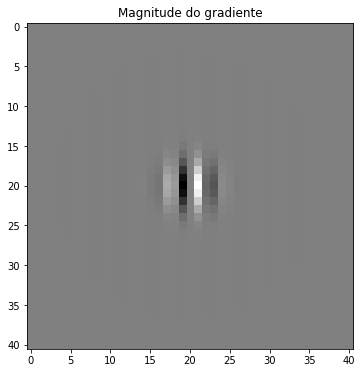

In [7]:
#
# Plotar o filtro gerador usando a função imshow do pyplot
#

plt.figure(figsize=[6,6])
plt.imshow(gabFilter, 'gray')
plt.title('Magnitude do gradiente')

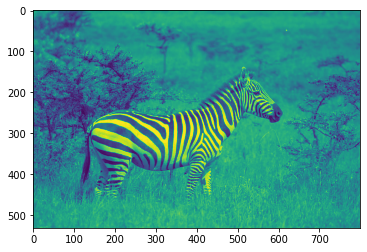

In [8]:
#path = "INSERIR PATH AQUI"
filename = "Zebra.jpg"
imageRGB = cv2.imread(filename) #cv2.imread(path + filename)
imageGRAY = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
plt.imshow(imageGRAY)

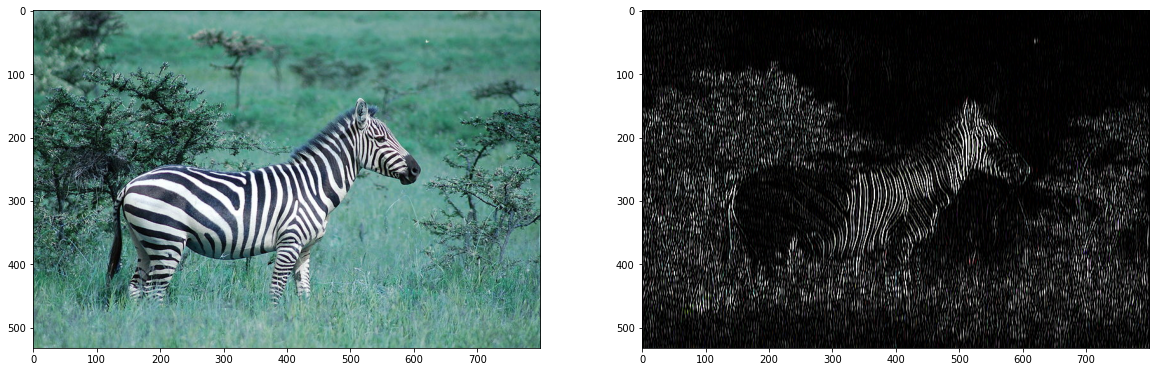

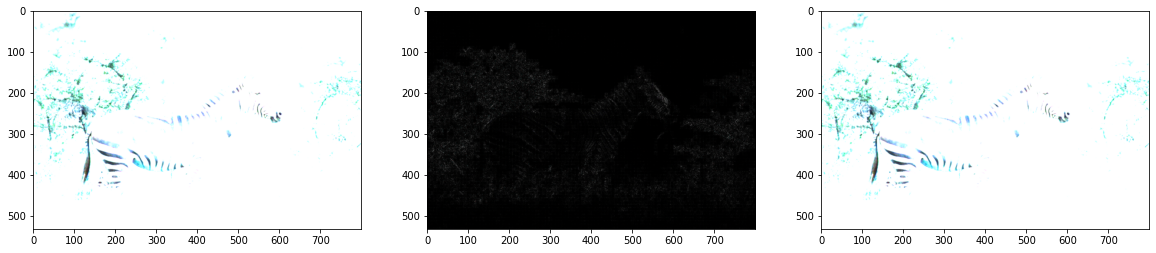

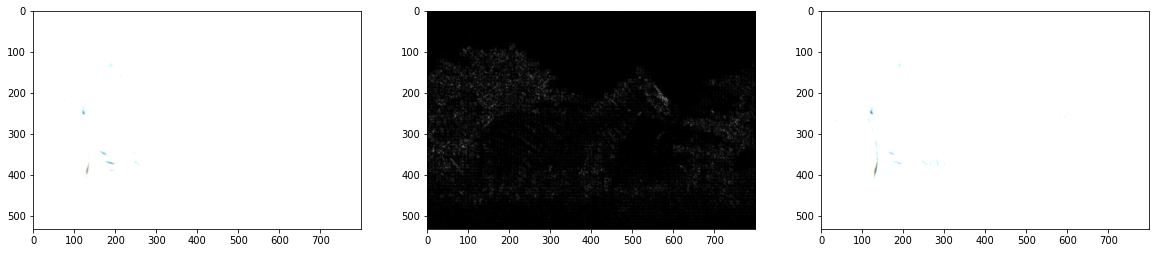

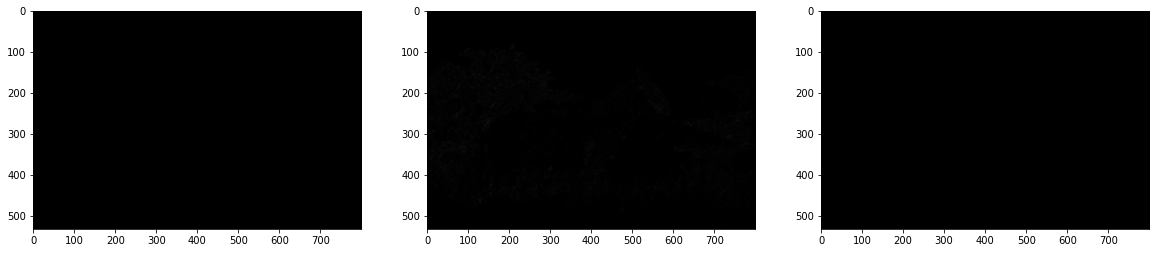

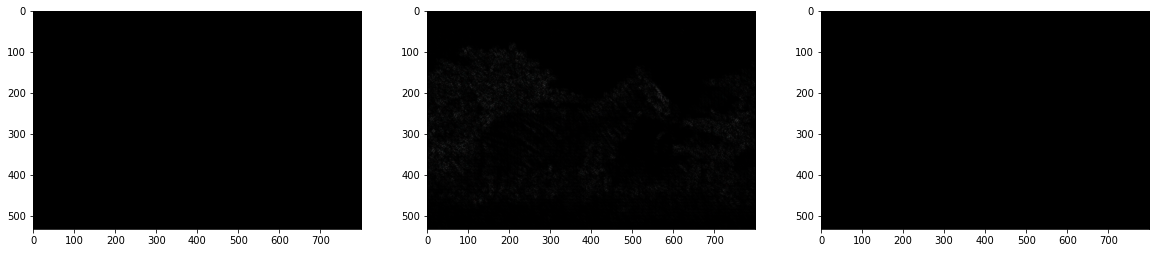

In [9]:
#
# Utilizando a função filter2D do OpenCV, faça a convolução da imagem com o filtro Gabor 
#
# OBS: modifique os parâmetros e verifique o que acontece com o resultado da filtragem
#

_imgOut = cv2.filter2D(imageRGB, -1, gabFilter)
plt.figure(figsize=[20,20])
plt.subplot(121),plt.imshow(imageRGB, cmap = 'gray')
plt.subplot(122),plt.imshow(_imgOut, cmap = 'gray')
plt.show()

# FOR THE NORMAL FILTER
plt.figure(figsize=[20,20])
_imgOutA0 = cv2.filter2D(imageRGB, -1, gabFilterA0)
plt.subplot(431),plt.imshow(_imgOutA0, cmap = 'gray')
_imgOutA45 = cv2.filter2D(imageRGB, -1, gabFilterA45)
plt.subplot(432),plt.imshow(_imgOutA45, cmap = 'gray')
_imgOutA90 = cv2.filter2D(imageRGB, -1, gabFilterA90)
plt.subplot(433),plt.imshow(_imgOutA90, cmap = 'gray')

plt.figure(figsize=[20,20])
_imgOutB0 = cv2.filter2D(imageRGB, -1, gabFilterB0)
plt.subplot(434),plt.imshow(_imgOutB0, cmap = 'gray')
_imgOutB45 = cv2.filter2D(imageRGB, -1, gabFilterB45)
plt.subplot(435),plt.imshow(_imgOutB45, cmap = 'gray')
_imgOutB90 = cv2.filter2D(imageRGB, -1, gabFilterB90)
plt.subplot(436),plt.imshow(_imgOutB90, cmap = 'gray')

# FOR THE ODD GABOR FILTER
plt.figure(figsize=[20,20])
o_imgOutA0 = cv2.filter2D(imageRGB, -1, odd_gabFilterA0)
plt.subplot(437),plt.imshow(o_imgOutA0, cmap = 'gray')
o_imgOutA45 = cv2.filter2D(imageRGB, -1, odd_gabFilterA45)
plt.subplot(438),plt.imshow(o_imgOutA45, cmap = 'gray')
o_imgOutA90 = cv2.filter2D(imageRGB, -1, odd_gabFilterA90)
plt.subplot(439),plt.imshow(o_imgOutA90, cmap = 'gray')

plt.figure(figsize=[20,20])
o_imgOutB0 = cv2.filter2D(imageRGB, -1, odd_gabFilterB0)
plt.subplot(4, 3, 10),plt.imshow(o_imgOutB0, cmap = 'gray')
o_imgOutB45 = cv2.filter2D(imageRGB, -1, odd_gabFilterB45)
plt.subplot(4, 3, 11),plt.imshow(o_imgOutB45, cmap = 'gray')
o_imgOutB90 = cv2.filter2D(imageRGB, -1, odd_gabFilterB90)
plt.subplot(4, 3, 12),plt.imshow(o_imgOutB90, cmap = 'gray')

plt.show()

# **2.0 - Definição do filtro de Gabor 2D (domínio da frequência)**

Selecione um dos filtros gerados acima e, utilizando a fft, gere o filtro no domínio da frequência. Realize a filtragem da imagem  no domínio da frequência e retorne para o domínio da imagem usando a função ifft.

Pense sobre como proceder com a tarefa solicitada acima. 

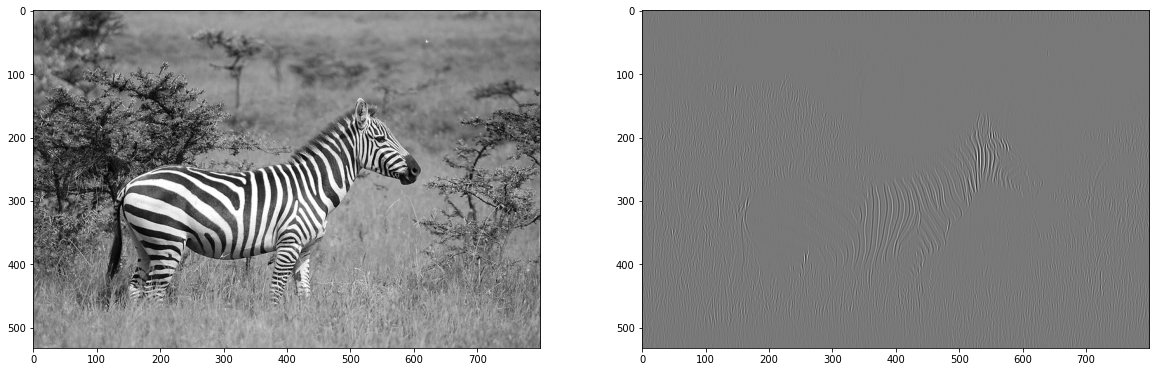

In [10]:
# Defining some parameters
ksize = 40
sigma = 2
theta = 0
labda = np.pi/4
gamma = 1.0
phi = np.pi/2

# imageRGB = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# img_rows, img_cols = imageRGB.shape
# img_padded = np.zeros((1025, 1025), dtype=imageRGB.dtype)
# for row in range(img_rows):
#   for col in range(img_cols):
#     img_padded[row, col] = imageRGB[row, col]

# gabFilter = cv2.getGaborKernel((img_padded.shape), sigma, theta, labda, gamma, phi)

# img_rows, img_cols = img_padded.shape
# for row in range(img_rows):
#   for col in range(img_cols):
#     img_padded[row, col] = img_padded[row, col]*((-1)**(row+col))
#     gabFilter[row, col] = gabFilter[row, col]*((-1)**(row+col))

# img_Y = np.fft.fft2(img_padded)
# flt_Y = np.fft.fft2(gabFilter)

# imgBack_Y = img_Y * flt_Y
# imgBack = np.fft.ifft2(imgBack_Y)

# img_rows, img_cols = img_padded.shape
# for row in range(img_rows):
#   for col in range(img_cols):
#     imgBack[row, col] = imgBack[row, col]*((-1)**(row+col))

# imgBack = np.real(imgBack)

imageRGB = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
gabFilter = cv2.getGaborKernel((ksize, ksize), sigma, theta, labda, gamma, phi)

# Pad the filter, it does not chage him by the way but we need to do it
img_rows, img_cols = gabFilter.shape
flt_padded = np.zeros((imageRGB.shape), dtype=gabFilter.dtype)
for row in range(img_rows):
  for col in range(img_cols):
    flt_padded[row, col] = gabFilter[row, col]

imgY = np.fft.fft2(imageRGB)
imgYshift = np.fft.fftshift(imgY)
fltY = np.fft.fft2(flt_padded)
fltYshift = np.fft.fftshift(fltY)

# Convolution at one domain is the same as multiplication on another domain (frequency)
FilteredImage = imgYshift * fltYshift

ImgYBack_ishift = np.fft.ifftshift(FilteredImage)
ImgBack = np.fft.ifft2(ImgYBack_ishift)
ImgBack = np.real(ImgBack)

plt.figure(figsize=[20,20])
plt.subplot(121),plt.imshow(imageRGB, cmap = 'gray')
plt.subplot(122),plt.imshow(ImgBack, cmap = 'gray')
plt.show()